In [23]:
%run '0.0_init_configuration.ipynb'

### Decision Tree

We will be using a tumor sample dataset, which contains lab test results about tumor samples. The objective is to classify whether a tumor is malicious (cancer) or benign. As such, it is a typical binary classification task.

### Objectives
- Train decision tree models with customized hyperparameters
- Evaluate decision tree models on classification tasks
- Visualize decision tree models by plotting the tree
- Tune the hyperparameters to find the optimized one for a specific task

In [24]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/tumor.csv"
df = pd.read_csv(url)
df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


Each observation in this dataset contains lab tests results about a tumor sample, such as clump or shapes. Based on these lab test results or features, we want to build a classification model to predict if this tumor sample is malicious (cancer) and benign. The target variable y is specified in the Class column.

Then, let's split the dataframe into train and testing data

In [25]:
rs = 123

#Get the input features 
X = df.iloc[:,:-1]

#Get the target variable
y = df.iloc[:,-1:]

# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, 
                                                stratify = y, random_state=rs)

# Train a default decision tree
model = DecisionTreeClassifier(random_state=rs)

#fit
model.fit(X_train, y_train)

#make prediction on the test data
preds = model.predict(X_test)

In [26]:
def evaluate_metrics(yt, yp):
    result_pos = {}
    result_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    result_pos['recall'] = recall
    result_pos['precision'] = precision
    result_pos['f1score'] = f_beta
    return result_pos

In [27]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9562043795620438,
 'recall': 0.9583333333333334,
 'precision': 0.92,
 'f1score': 0.9387755102040817}

Now we can see that the trained decision model has very good classification results on the testing data, with a very high F1 score around 0.94. Next, let's try to visualize and interpret the trained decision tree model.



### Visualize the trained decision tree

We will be using the `tree.plot_tree()` method provided by `sklearn` to quickly plot any decision tree model.

In [28]:
def plot_decision_tree(model,feature_names):
    plt.subplots(figsize = (20,20))
    tree.plot_tree(model, feature_names=feature_names,filled=True)
    plt.show()

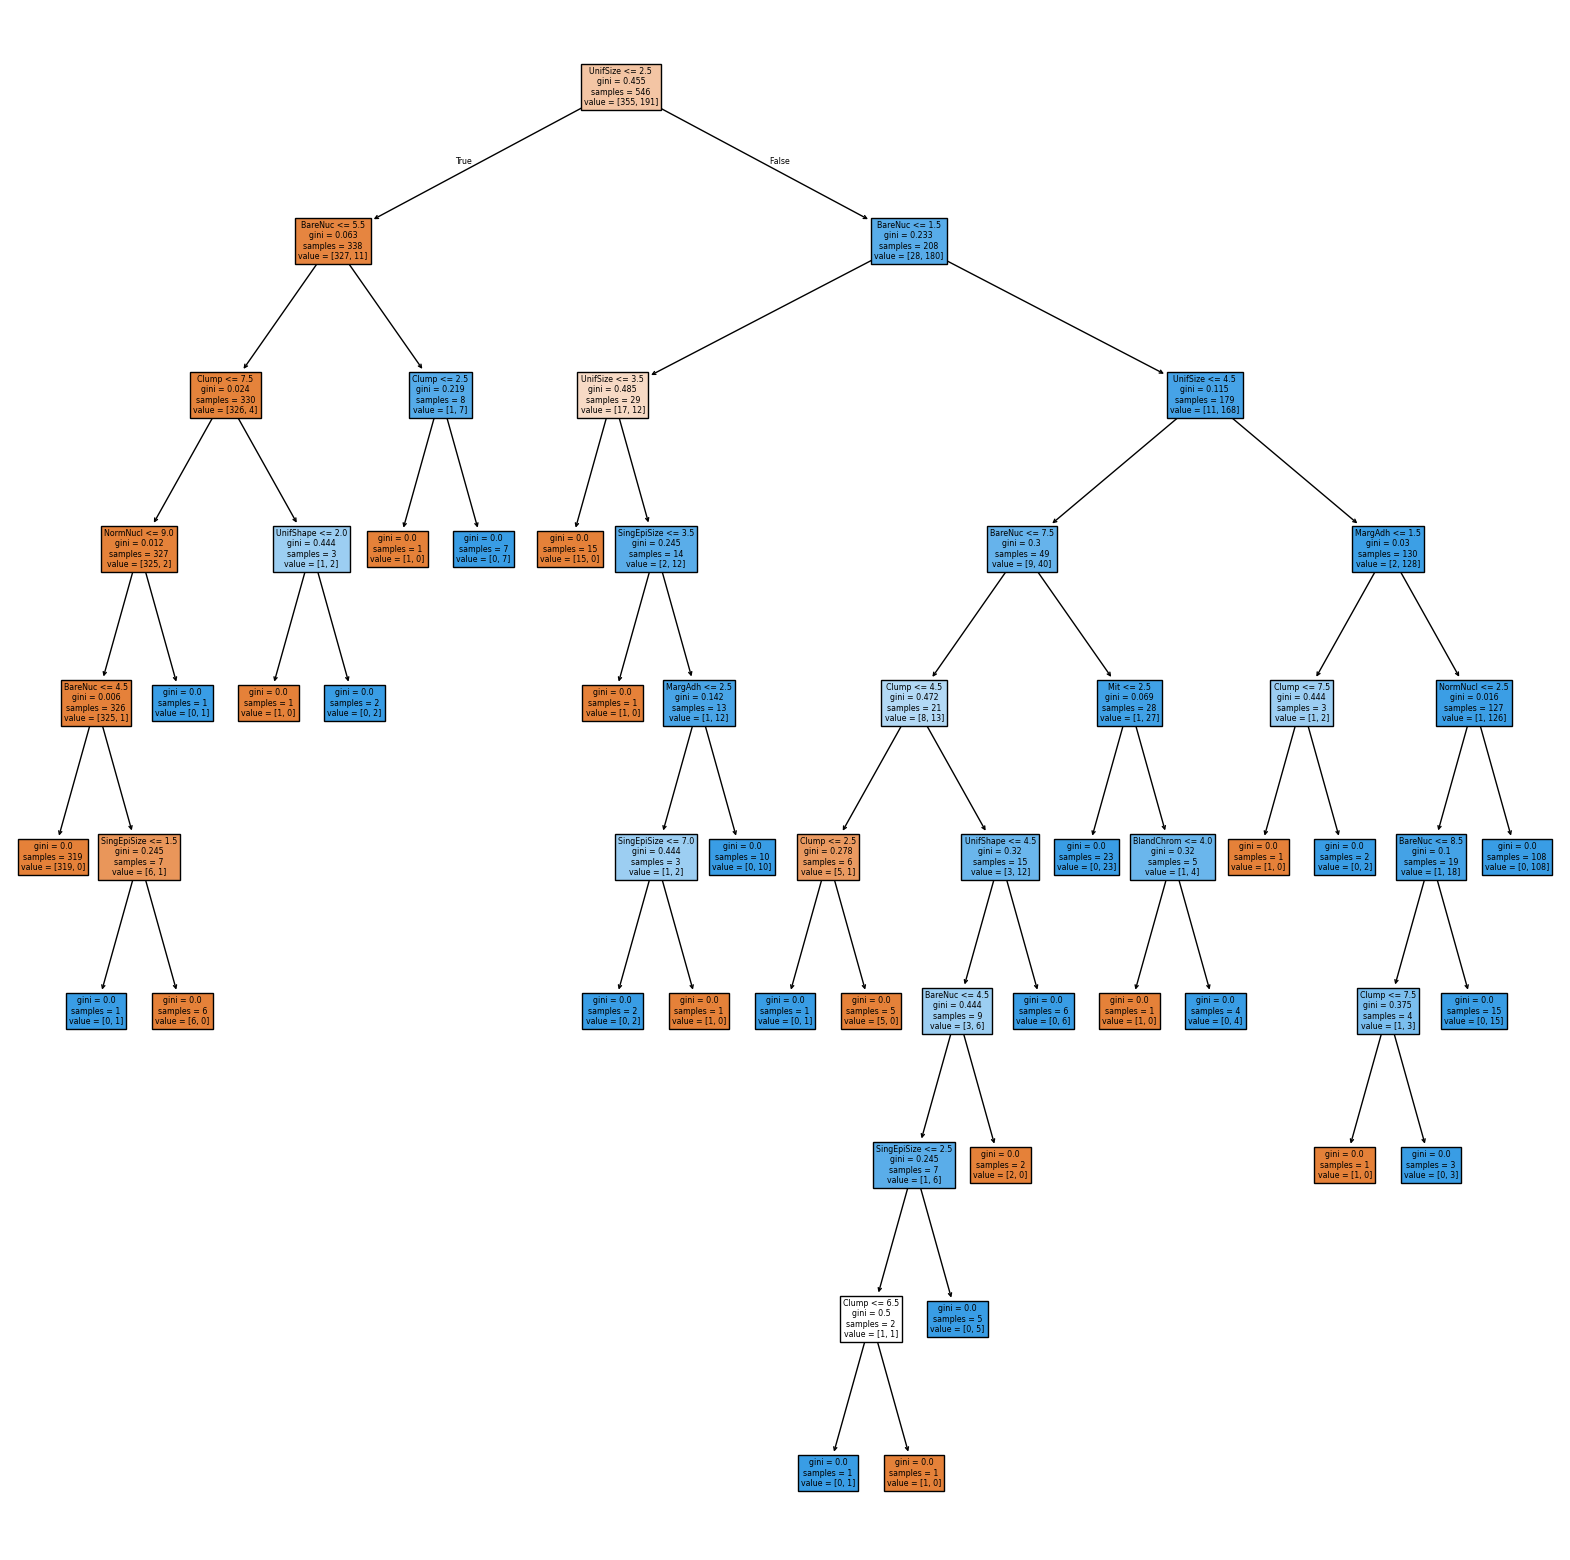

In [29]:
feature_names = X.columns.values

plot_decision_tree(model, feature_names)

And you should see a relatively complex decision tree model being plotted. First, you may notice the decision tree is color-labeled, orange node means a majority of samples in the node belong to Class 0 and blue node means a majority of samples in the node belong to Class 1, and white node means it has an equal amount of Class 0 and Class 1 samples.

Because the tree is very big, so the rules and split threshold on each node are very difficult to see. In addition, big decision trees may easily bring large variance and cause overfitting. Next, let's try to build simplified decision trees, and hopefully the simplified decision trees may generate even better results.

In [30]:
model.classes_


array([0, 1])